In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Directorios
base = '/content/drive/MyDrive/Notebooks/ML'
trains = '/content/drive/MyDrive/Notebooks/ML/train'
tests = '/content/drive/MyDrive/Notebooks/ML/test'

train_datagen = ImageDataGenerator(
    # Preprocesar y generar imagenes nuevas
    rescale = 1./255,
    rotation_range = 5,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.3,
    horizontal_flip = True,
    brightness_range = [0.8, 1.5],
    validation_split = 0.20
)

train_gen = train_datagen.flow_from_directory(
    trains,
    target_size = (255, 255),
	color_mode='rgba',
    batch_size = 10,
    class_mode = "binary", # Solo dos clases
    subset = 'training',
    shuffle = True
)

val_gen = train_datagen.flow_from_directory(
    trains,
    target_size = (255, 255),
 	color_mode='rgba',
    batch_size = 10,
    class_mode = "binary", # Solo dos clases
    subset = 'validation',
    shuffle = False
)

Found 2630 images belonging to 2 classes.
Found 656 images belonging to 2 classes.


(10, 255, 255, 4)
[0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]


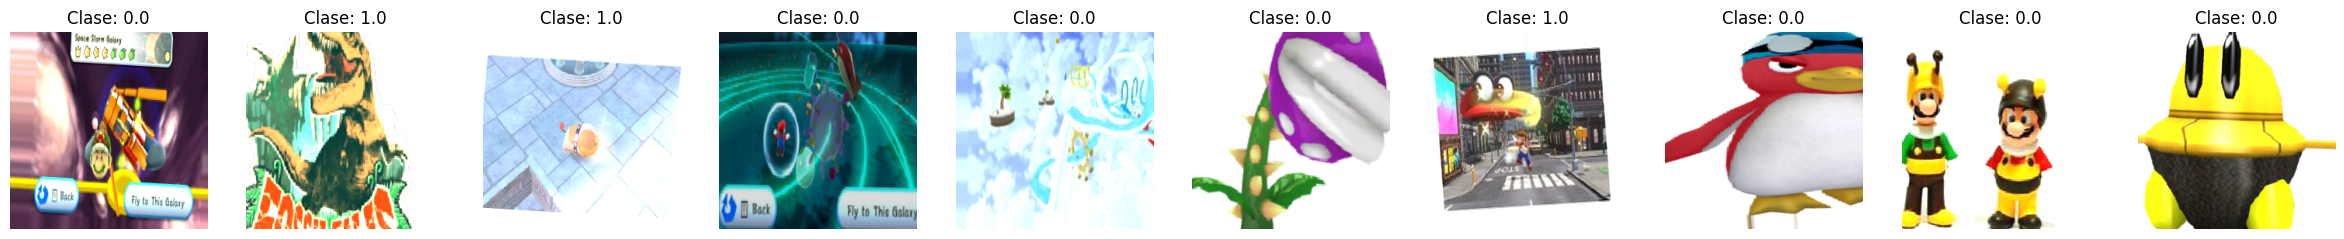

<Figure size 640x480 with 0 Axes>

In [4]:
# Ver batch
images, labels = train_gen[0]
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

print(images.shape)
# Output: Batch size, img width, img height, amount of params per pixel
print(labels)
# Output: Clase en forma de binario

plt.figure()

for i in range(images.shape[0]):
    axarr[i].imshow(images[i])
    axarr[i].set_title(f"Clase: {labels[i]}")
    axarr[i].axis("off")

In [5]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (255,255,4),))
# Input shape is size x, size y, and spectrums(rgba)
model.add(layers.Conv2D(20, (3, 3), activation="relu"))
model.add(layers.Conv2D(30, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 10)   │           370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 251, 251, 20)   │         1,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 249, 249, 30)   │         5,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1860030)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │   476,167,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,192,069 (1.77 GB)

 Trainable params: 476,192,069 (1.77 GB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
						train_gen,
						validation_data = val_gen,
						verbose = 1,
						epochs = 16)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/16
263/263 ━━━━━━━━━━━━━━━━━━━━ 808s 3s/step - accuracy: 0.5805 - loss: 0.7362 - val_accuracy: 0.6738 - val_loss: 0.5975
Epoch 2/16
263/263 ━━━━━━━━━━━━━━━━━━━━ 153s 369ms/step - accuracy: 0.6717 - loss: 0.6253 - val_accuracy: 0.6768 - val_loss: 0.5880
Epoch 3/16
263/263 ━━━━━━━━━━━━━━━━━━━━ 93s 352ms/step - accuracy: 0.7107 - loss: 0.5681 - val_accuracy: 0.6570 - val_loss: 0.6037
Epoch 4/16
263/263 ━━━━━━━━━━━━━━━━━━━━ 92s 350ms/step - accuracy: 0.7064 - loss: 0.5763 - val_accuracy: 0.6875 - val_loss: 0.5809
Epoch 5/16
263/263 ━━━━━━━━━━━━━━━━━━━━ 92s 350ms/step - accuracy: 0.7379 - loss: 0.5366 - val_accuracy: 0.6875 - val_loss: 0.5888
Epoch 6/16
263/263 ━━━━━━━━━━━━━━━━━━━━ 92s 350ms/step - accuracy: 0.7316 - loss: 0.5313 - val_accuracy: 0.6860 - val_loss: 0.5845
Epoch 7/16
263/263 ━━━━━━━━━━━━━━━━━━━━ 92s 351ms/step - accuracy: 0.7497 - loss: 0.5237 - val_accuracy: 0.6890 - val_loss: 0.5732
Epoch 8/16
263/263 ━━━━━━━━━━━━━━━━━━━━ 93s 354ms/step - accuracy: 0.7463 - loss: 0.

<ipython-input-15-45c9006c2508>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs,history.history["loss"], 'bo', label ='training loss', color = "red")
<ipython-input-15-45c9006c2508>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs,history.history["val_loss"],'bo',label='validation loss', color = "blue")


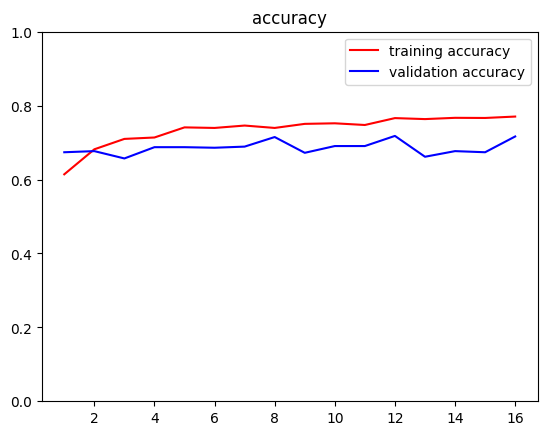

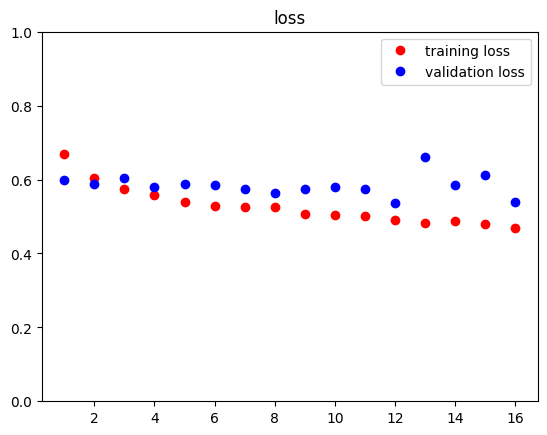

In [ ]:
epochs = range(1, len(history.history["accuracy"])+1)
plt.plot(epochs,history.history["accuracy"],label='training accuracy', color = "red")
plt.plot(epochs,history.history["val_accuracy"],label='validation accuracy', color = "blue")
plt.ylim(0,1)
plt.title('accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,history.history["loss"], label ='training loss', color = "red")
plt.plot(epochs,history.history["val_loss"],label='validation loss', color = "blue")
plt.ylim(0,1)
plt.title('loss')
plt.legend()
plt.show()

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
					tests,
					target_size = (255, 255),
					color_mode='rgba',
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_gen, steps = 25)
print('\ntest acc :\n', test_acc)


Found 798 images belonging to 2 classes.
25/25 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - accuracy: 0.7761 - loss: 0.5199

test acc :
 0.7459999918937683


(20, 255, 255, 4)
[0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.]


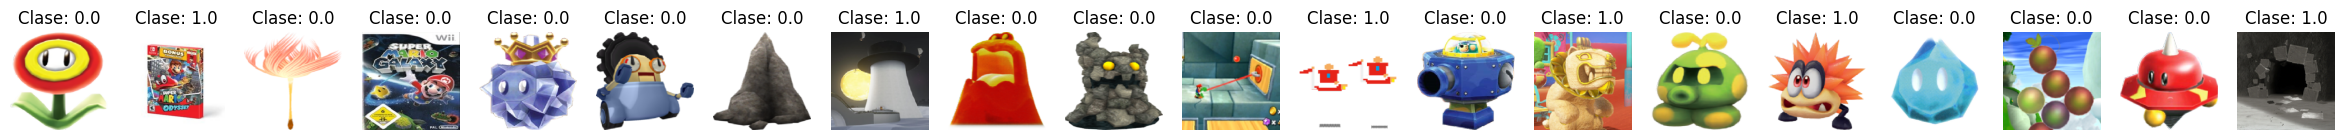

<Figure size 640x480 with 0 Axes>

In [10]:
# Ver batch
imagest, labelst = test_gen[0]
f, axarr = plt.subplots(1, imagest.shape[0], figsize=(30, 4))

print(imagest.shape)
# Output: Batch size, img width, img height, amount of params per pixel
print(labelst)
# Output: Clase en forma de binario

plt.figure()

for i in range(imagest.shape[0]):
    axarr[i].imshow(imagest[i])
    axarr[i].set_title(f"Clase: {labelst[i]}")
    axarr[i].axis("off")

In [11]:
val_loss, val_acc = model.evaluate(val_gen, steps = 25)
print('\nval acc :\n', val_acc)

25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - accuracy: 0.7374 - loss: 0.4946

val acc :
 0.7400000095367432


In [12]:
test_imgs = test_gen[0][0]
test_labels = test_gen[0][1]

predictions = model.predict(test_imgs)
classes_x = np.argmax(predictions,axis=1)
classes_x

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
TG = 0
TO = 0
FG = 0
FO = 0

for i in range(len(classes_x)):
  if classes_x[i] == 1:
    if test_labels[i] == 1:
      TO = TO + 1
    else :
      FO = FO + 1
  else:
    if test_labels[i] == 0:
      TG = TG + 1
    else :
      FG = FG + 1


print('   ', 'SMG', 'SMO')
print('SMG', TG, "  ", FG)
print('SMO', FO, "  ", TO)

    SMG SMO
SMG 14    6
SMO 0    0


In [14]:
model.save('which_mario.keras')